# 🧠 GoldenMetrics EDA – Sales & Inventory Intelligence for Luxury Retail  
**Exploratory Data Analysis | Advanced KPI Monitoring | Operational Insights**


# GoldenMetrics – Exploratory Data Analysis
This notebook contains the first phase of the GoldenMetrics project: a professional EDA (Exploratory Data Analysis) on luxury retail sales data.

**Objectives of this notebook:**
- Load and inspect the dataset structure
- Understand variables and distributions
- Identify data quality issues and preprocessing needs
- Prepare for business-driven analysis and modeling


## 📚 Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Sales Trends](#sales-trends)
3. [Customer Analysis](#customer-analysis)
4. [Campaign Impact](#campaign-impact)
5. [Product Profitability](#product-profitability)
6. [Inventory Insights](#inventory-insights)
   - [Out-of-Stock Detection](#out-of-stock-detection)
   - [Dead Stock Detection](#dead-stock-detection)
   - [Inventory Turnover](#inventory-turnover)
7. [Executive Summary](#executive-summary)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visual style
sns.set(style='whitegrid', palette='pastel')

## 1. Load dataset
We load the pre-simulated dataset located in the `data/` folder and begin with a structural check.

In [6]:
# Load the CSV file
df = pd.read_csv('data/goldenmetrics_dataset_v2.csv')
df.head()

,Fecha,Tienda,SKU,Producto,Categoría,Precio (€),Coste_unitario (€),Margen_unitario (€),Unidades_vendidas,Tipo_cliente,Canal_venta,Método_pago,Campaña,Temporada,Stock_inicial,Stock_final,Reposición_necesaria,Región
0,2024-06-17,NY Soho,GG-SN251,Ball Star,Sneakers,843.30,437.33,405.97,1,Regular,Físico,Tarjeta,Colección Primavera,Otoño,18,17,False,EE.UU.
1,2024-10-30,Madrid Serrano,GG-SN756,Ball Star,Sneakers,1826.50,1098.55,727.95,0,Regular,Físico,Online,Colección Primavera,Otoño,6,6,True,Europa
2,2024-04-22,GoldenGoose.com,GG-SN569,Ball Star,Sneakers,1027.05,454.23,572.82,2,Turista,Online,Tarjeta,Edición Limitada,Invierno,32,30,False,Global
3,2024-04-02,Tokio Ginza,GG-BO844,Tote GG,Bolsos,1732.30,972.78,759.52,1,Regular,Físico,Tarjeta,Navidad Exclusiva,Primavera,18,17,False,Asia
4,2024-09-13,NY Soho,GG-AC587,Bufanda Lux,Accesorios,1833.45,1060.46,772.99,3,Regular,Físico,Tarjeta,NaN,Verano,13,10,False,EE.UU.


## 2. Initial inspection
We examine the shape, data types, and missing values to understand the structure and completeness of the dataset.

In [7]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Data types and non-null values
df.info()

# Missing values by column
df.isnull().sum()

Rows: 5000, Columns: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 5000 non-null   object 
 1   Tienda                5000 non-null   object 
 2   SKU                   5000 non-null   object 
 3   Producto              5000 non-null   object 
 4   Categoría             5000 non-null   object 
 5   Precio (€)            5000 non-null   float64
 6   Coste_unitario (€)    5000 non-null   float64
 7   Margen_unitario (€)   5000 non-null   float64
 8   Unidades_vendidas     5000 non-null   int64  
 9   Tipo_cliente          5000 non-null   object 
 10  Canal_venta           5000 non-null   object 
 11  Método_pago           5000 non-null   object 
 12  Campaña               3976 non-null   object 
 13  Temporada             5000 non-null   object 
 14  Stock_inicial         5000 non-null   int64  
 1

Fecha                      0
Tienda                     0
SKU                        0
Producto                   0
Categoría                  0
Precio (€)                 0
Coste_unitario (€)         0
Margen_unitario (€)        0
Unidades_vendidas          0
Tipo_cliente               0
Canal_venta                0
Método_pago                0
Campaña                 1024
Temporada                  0
Stock_inicial              0
Stock_final                0
Reposición_necesaria       0
Región                     0
dtype: int64

## 4. Data Preparation and Feature Engineering

Before diving into deeper analysis, we prepare the dataset by:
- Converting the 'Fecha' column to datetime format
- Creating new time-based features: 'Month', 'Year', 'Weekday'
- Handling missing values in the 'Campaña' column


In [8]:
# Convert 'Fecha' to datetime format
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Create new time-based features
df['Month'] = df['Fecha'].dt.month
df['Year'] = df['Fecha'].dt.year
df['Weekday'] = df['Fecha'].dt.day_name()

# Replace missing values in 'Campaña' with 'Sin campaña'
df['Campaña'] = df['Campaña'].fillna('Sin campaña')

# Verify the changes
print(df[['Fecha', 'Month', 'Year', 'Weekday', 'Campaña']].head())


       Fecha  Month  Year    Weekday              Campaña
0 2024-06-17      6  2024     Monday  Colección Primavera
1 2024-10-30     10  2024  Wednesday  Colección Primavera
2 2024-04-22      4  2024     Monday     Edición Limitada
3 2024-04-02      4  2024    Tuesday    Navidad Exclusiva
4 2024-09-13      9  2024     Friday          Sin campaña


## 5.1 Sales Trends by Channel and Region

We begin the advanced EDA by analyzing total units sold and total revenue grouped by sales channel (Online vs Physical) and by geographic region. This helps identify where the strongest sales activity is taking place and which channels are performing better.


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/3029523602.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  canal_group['Total_revenue (€)'] = df.groupby('Canal_venta').apply(


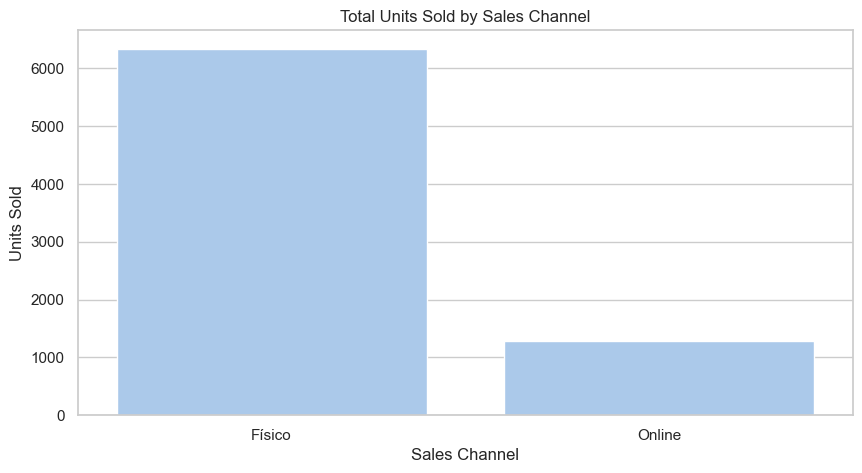

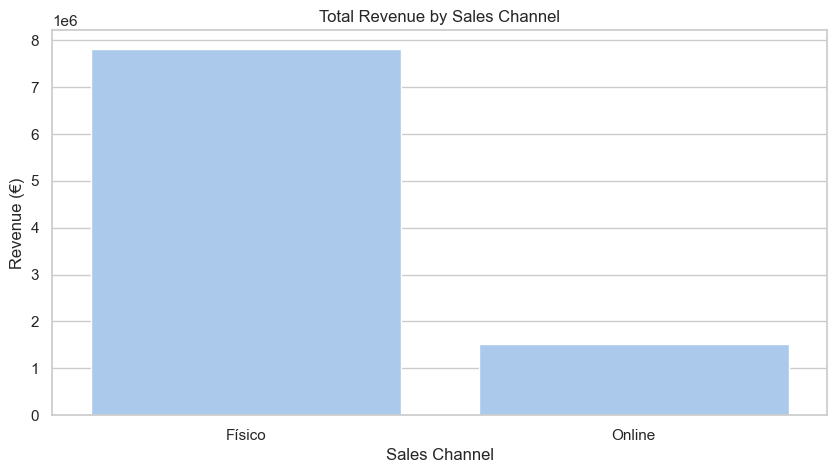

/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/3029523602.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  region_group['Total_revenue (€)'] = df.groupby('Región').apply(


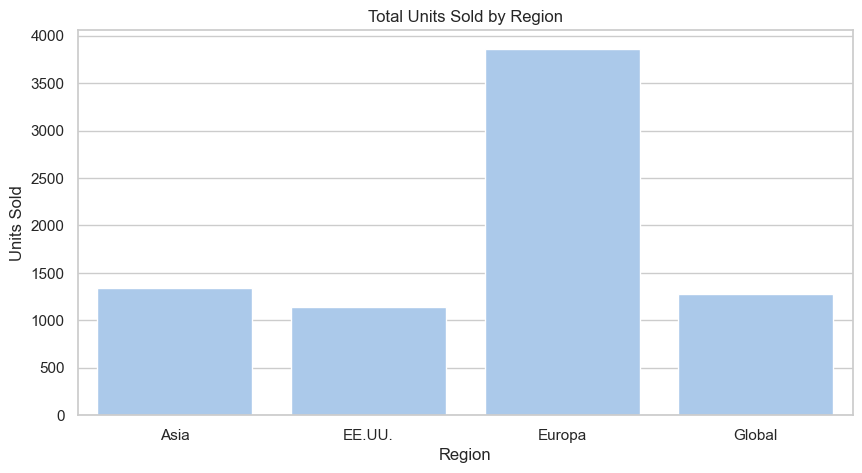

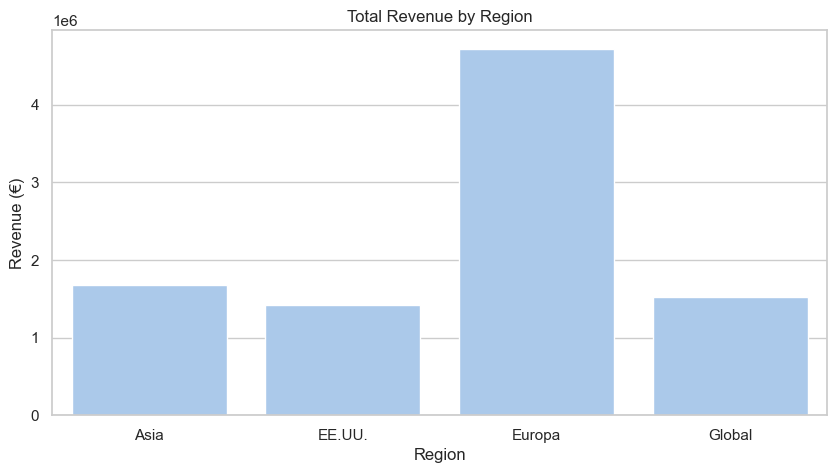

In [9]:
# Group total units sold and revenue by channel
canal_group = df.groupby('Canal_venta').agg({
    'Unidades_vendidas': 'sum',
    'Precio (€)': 'mean'
}).reset_index()
canal_group['Total_revenue (€)'] = df.groupby('Canal_venta').apply(
    lambda x: (x['Unidades_vendidas'] * x['Precio (€)']).sum()
).values

# Plot with Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=canal_group, x='Canal_venta', y='Unidades_vendidas')
plt.title("Total Units Sold by Sales Channel")
plt.ylabel("Units Sold")
plt.xlabel("Sales Channel")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=canal_group, x='Canal_venta', y='Total_revenue (€)')
plt.title("Total Revenue by Sales Channel")
plt.ylabel("Revenue (€)")
plt.xlabel("Sales Channel")
plt.show()

# Group total units sold and revenue by region
region_group = df.groupby('Región').agg({
    'Unidades_vendidas': 'sum',
    'Precio (€)': 'mean'
}).reset_index()
region_group['Total_revenue (€)'] = df.groupby('Región').apply(
    lambda x: (x['Unidades_vendidas'] * x['Precio (€)']).sum()
).values

# Plot regions
plt.figure(figsize=(10, 5))
sns.barplot(data=region_group, x='Región', y='Unidades_vendidas')
plt.title("Total Units Sold by Region")
plt.ylabel("Units Sold")
plt.xlabel("Region")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=region_group, x='Región', y='Total_revenue (€)')
plt.title("Total Revenue by Region")
plt.ylabel("Revenue (€)")
plt.xlabel("Region")
plt.show()


### Este bloque te permite:

 - Comparar ventas físicas vs online

 - Evaluar rendimiento por región (EE.UU., Asia, Europa, Global)

 - Identificar oportunidades o áreas con potencial

## 5.2 Product Demand Curves Over Time

This section analyzes the demand behavior of individual products. We visualize how unit sales evolve over time by product category or SKU. This allows us to detect patterns, seasonal trends, or high-performing product lines.


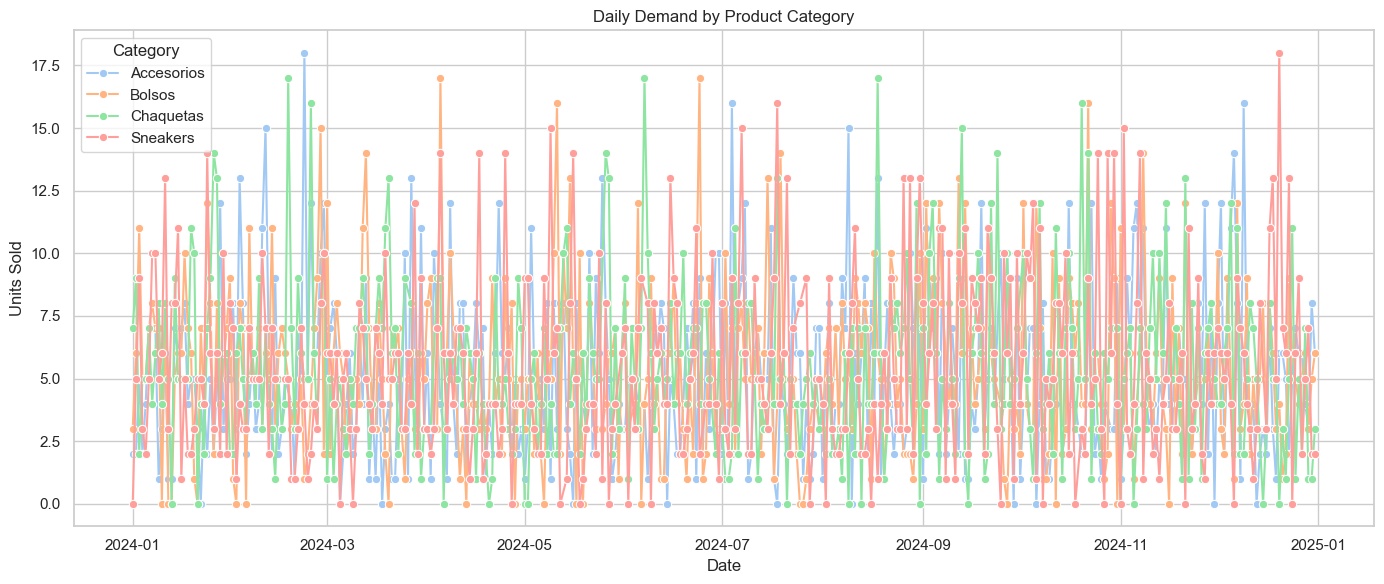

In [10]:
# Agrupar por Fecha y Categoría para obtener demanda por día
df_grouped = df.groupby(['Fecha', 'Categoría'])['Unidades_vendidas'].sum().reset_index()

# Graficar curvas de demanda por categoría
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped, x='Fecha', y='Unidades_vendidas', hue='Categoría', marker='o')
plt.title("Daily Demand by Product Category")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend(title='Category')
plt.tight_layout()
plt.show()


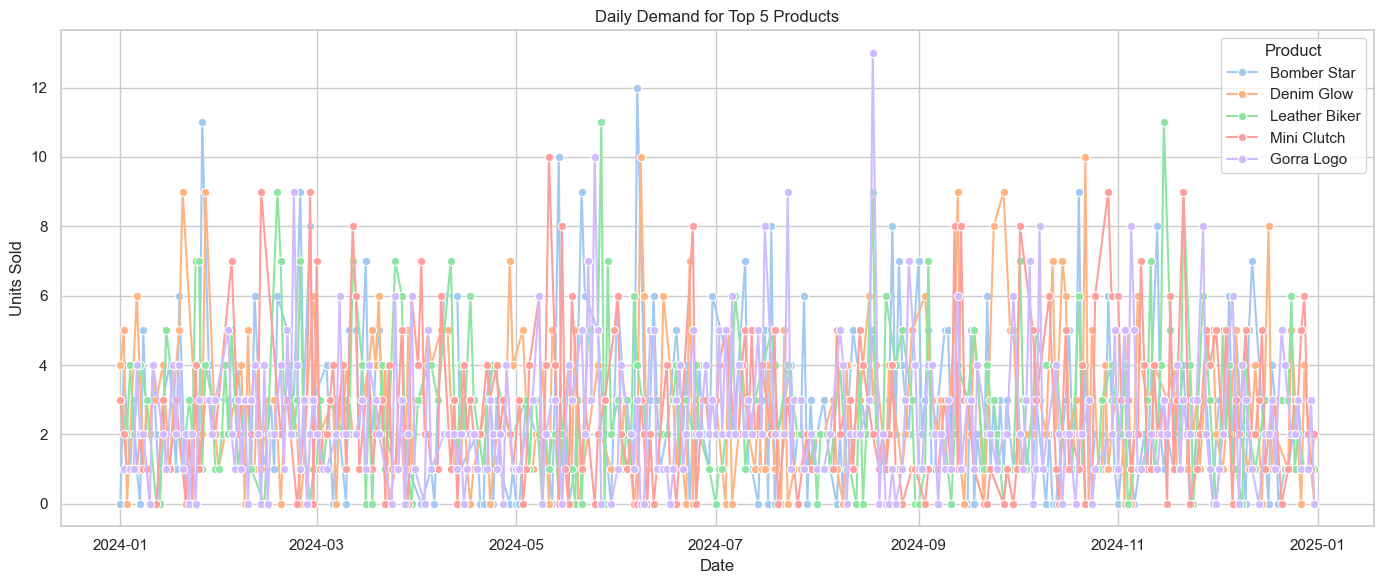

In [11]:
# Calcular top 5 productos más vendidos
top_productos = df.groupby('Producto')['Unidades_vendidas'].sum().sort_values(ascending=False).head(5).index

# Filtrar para esos productos
df_top = df[df['Producto'].isin(top_productos)]
df_top_grouped = df_top.groupby(['Fecha', 'Producto'])['Unidades_vendidas'].sum().reset_index()

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top_grouped, x='Fecha', y='Unidades_vendidas', hue='Producto', marker='o')
plt.title("Daily Demand for Top 5 Products")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend(title='Product')
plt.tight_layout()
plt.show()


### Con este análisis podrás:

- Ver qué categorías tienen estacionalidad fuerte (ej. chaquetas en invierno)

- Detectar caída o subida en productos específicos

- Justificar futuras predicciones basadas en series temporales

## 5.3 Product Portfolio Analysis – BCG Matrix

We now apply a BCG-style matrix to evaluate the strategic position of each product.  
This analysis compares each product's total revenue (rotation) vs. total margin (profitability), helping identify:

- ⭐ Stars: High sales and high margin  
- 🐄 Cash Cows: High margin, low sales  
- 🚀 Question Marks: High sales, low margin  
- 🐢 Dogs: Low sales and low margin  


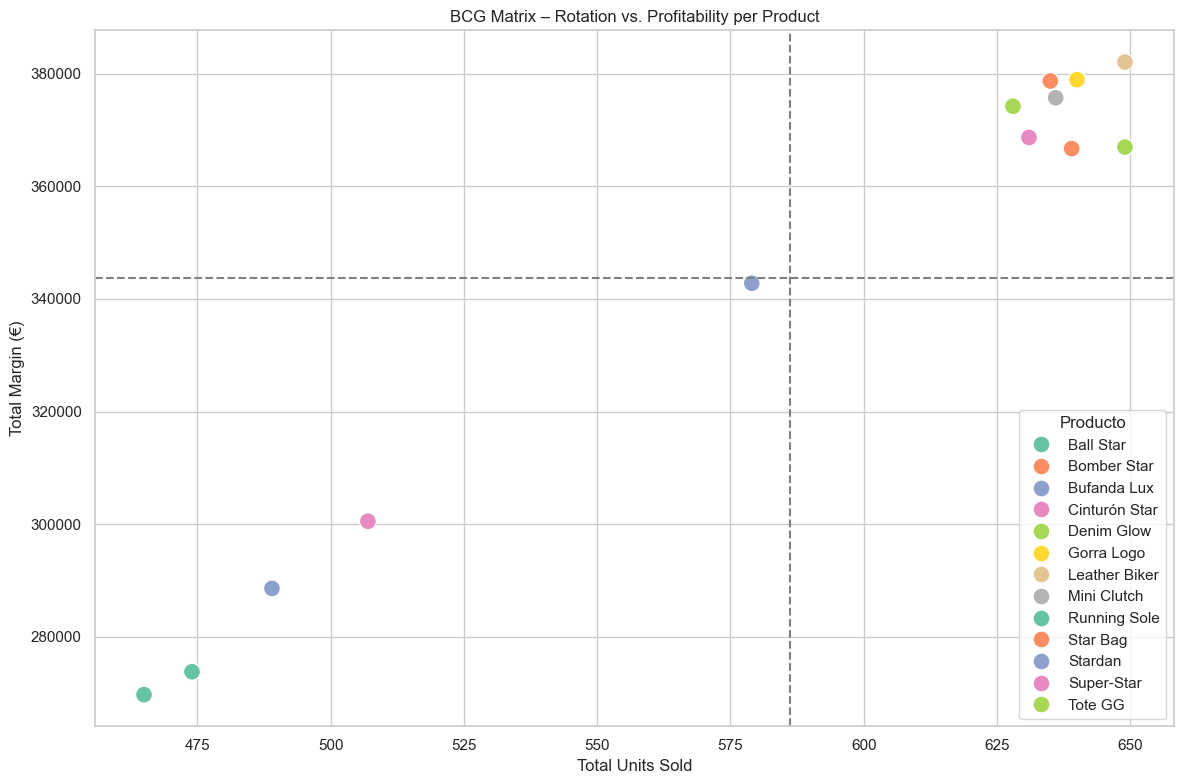

In [12]:
# Agrupar por producto: total vendido y margen total
bcg_df = df.groupby('Producto').agg({
    'Unidades_vendidas': 'sum',
    'Margen_unitario (€)': 'mean',
    'Precio (€)': 'mean'
}).reset_index()

# Calcular margen total estimado
bcg_df['Margen_total (€)'] = bcg_df['Unidades_vendidas'] * bcg_df['Margen_unitario (€)']
bcg_df['Ingresos_totales (€)'] = bcg_df['Unidades_vendidas'] * bcg_df['Precio (€)']

# Calcular medias
avg_margen = bcg_df['Margen_total (€)'].mean()
avg_ventas = bcg_df['Unidades_vendidas'].mean()

# Graficar Matriz BCG
plt.figure(figsize=(12, 8))
sns.scatterplot(data=bcg_df,
                x='Unidades_vendidas',
                y='Margen_total (€)',
                hue='Producto',
                s=150,
                palette='Set2')

# Líneas de corte
plt.axvline(avg_ventas, color='gray', linestyle='--')
plt.axhline(avg_margen, color='gray', linestyle='--')

# Etiquetas y título
plt.title("BCG Matrix – Rotation vs. Profitability per Product")
plt.xlabel("Total Units Sold")
plt.ylabel("Total Margin (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/106592682.py:33: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/106592682.py:33: UserWarning: Glyph 128004 (\N{COW}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/106592682.py:33: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/106592682.py:33: UserWarning: Glyph 128034 (\N{TURTLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/106592682.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/Users/kardiahq/Desktop/36.Retail Sales Project/luxmetrics/lib/python3.13/site-

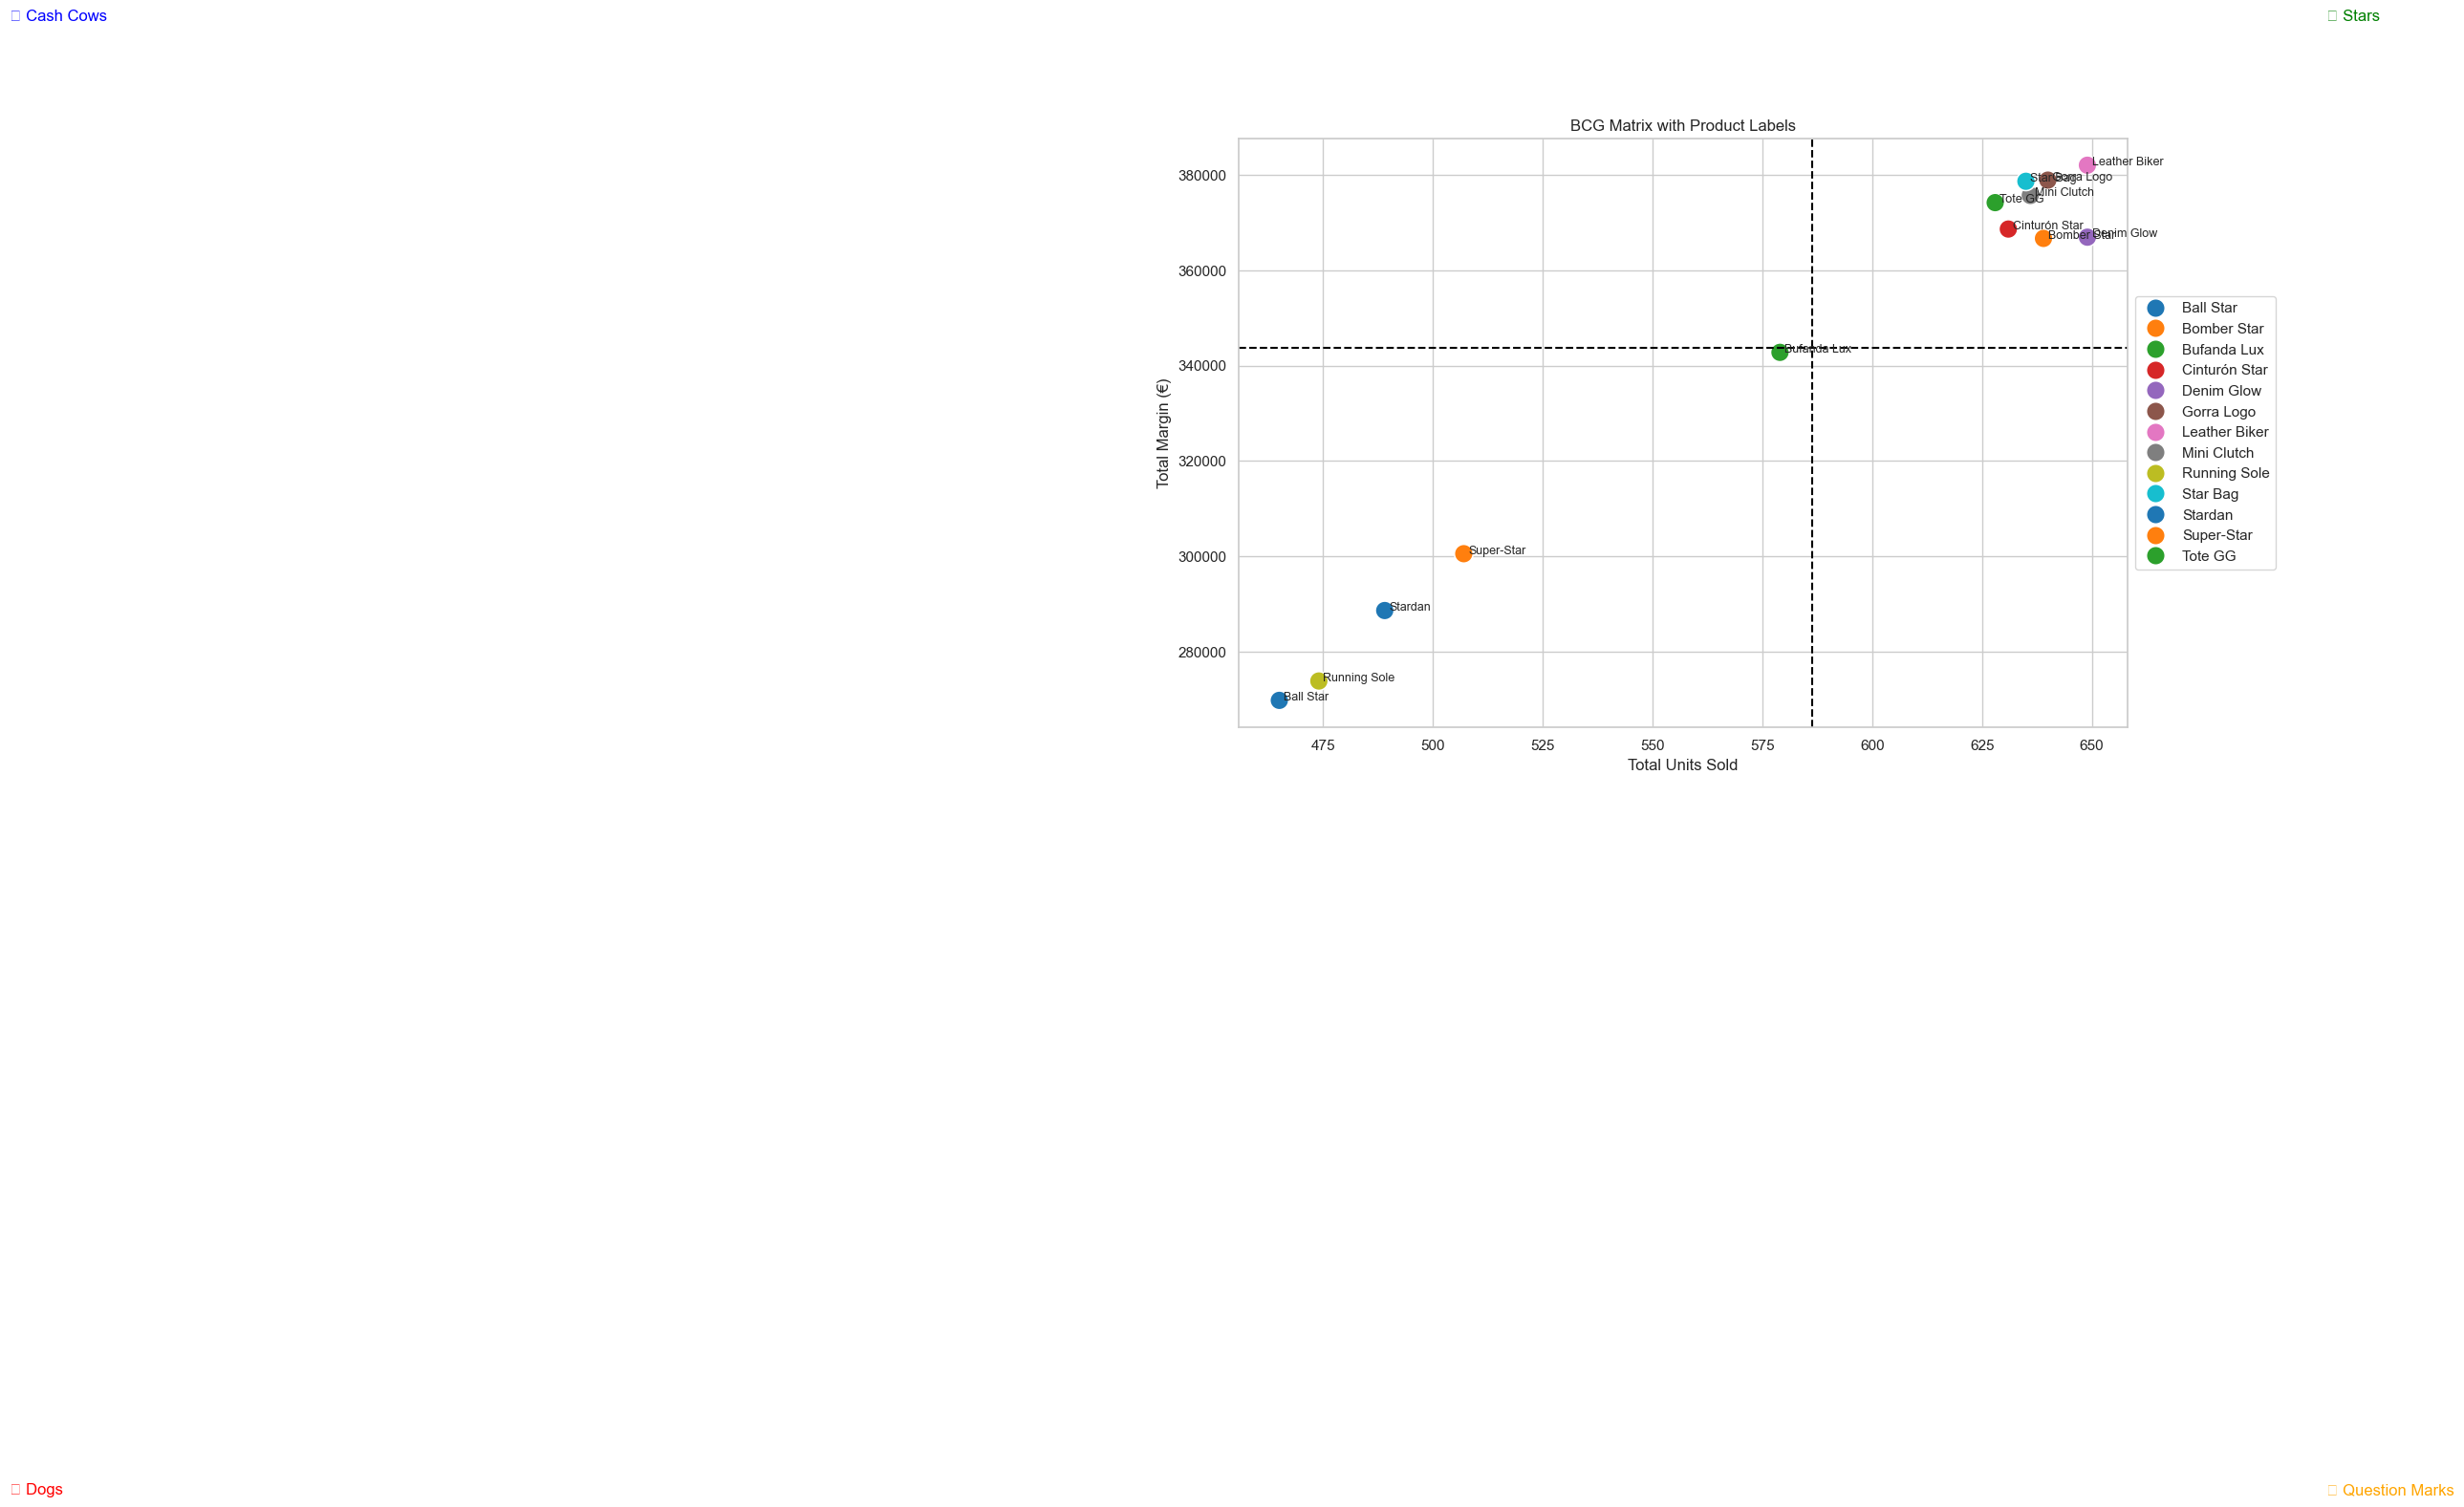

In [13]:
#Código BCG con etiquetas

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=bcg_df,
                     x='Unidades_vendidas',
                     y='Margen_total (€)',
                     s=200,
                     hue='Producto',
                     palette='tab10')

# Líneas medias
plt.axvline(avg_ventas, color='black', linestyle='--')
plt.axhline(avg_margen, color='black', linestyle='--')

# Etiquetas automáticas
for i in range(bcg_df.shape[0]):
    plt.text(x=bcg_df['Unidades_vendidas'][i]+1,
             y=bcg_df['Margen_total (€)'][i]+10,
             s=bcg_df['Producto'][i],
             fontsize=9)

# Cuadrantes explicativos (opcional visual)
plt.text(avg_ventas * 1.2, avg_margen * 1.2, "⭐ Stars", fontsize=12, color='green')
plt.text(avg_ventas * 0.3, avg_margen * 1.2, "🐄 Cash Cows", fontsize=12, color='blue')
plt.text(avg_ventas * 1.2, avg_margen * 0.3, "🚀 Question Marks", fontsize=12, color='orange')
plt.text(avg_ventas * 0.3, avg_margen * 0.3, "🐢 Dogs", fontsize=12, color='red')

plt.title("BCG Matrix with Product Labels")
plt.xlabel("Total Units Sold")
plt.ylabel("Total Margin (€)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [ ]:
"""
Matriz con tamaño de burbuja por precio medio

Esta es una versión más visual, usando Plotly, donde:

            - El eje X sigue siendo rotación (ventas)

            - El eje Y es rentabilidad (margen total)

            - El tamaño de cada burbuja representa el precio medio

            - Y puedes interactuar con el gráfico """

In [14]:
# Código con Plotly para visualización premium

# Agrupar por producto: total vendido y margen total
bcg_df = df.groupby('Producto').agg({
    'Unidades_vendidas': 'sum',
    'Margen_unitario (€)': 'mean',
    'Precio (€)': 'mean'
}).reset_index()

# Calcular margen total estimado
bcg_df['Margen_total (€)'] = bcg_df['Unidades_vendidas'] * bcg_df['Margen_unitario (€)']
bcg_df['Ingresos_totales (€)'] = bcg_df['Unidades_vendidas'] * bcg_df['Precio (€)']


In [15]:
# Código con Plotly para visualización premium

import plotly.express as px

fig = px.scatter(
    bcg_df,
    x='Unidades_vendidas',
    y='Margen_total (€)',
    size='Precio (€)',
    color='Producto',
    hover_data=['Producto', 'Precio (€)', 'Unidades_vendidas', 'Margen_total (€)'],
    title="BCG Matrix – Rotation vs. Profitability (Bubble Size = Avg Price)"
)

fig.update_layout(
    xaxis_title="Units Sold",
    yaxis_title="Total Margin (€)",
    legend_title="Product",
    template="plotly_white"
)

fig.show()


## 5.4 Monthly Performance – Average Ticket and Profitability

This section analyzes business performance over time, focusing on two key indicators:

- **Average ticket size**: average revenue per transaction
- **Monthly total margin**: sum of profit generated each month

This helps identify seasonal patterns, strong-performing periods, and opportunities for optimization.


In [16]:
# Crear columna de mes
df['Mes'] = df['Fecha'].dt.to_period('M')

# Ticket medio = ingresos / unidades vendidas
df['Ingresos_unitarios (€)'] = df['Precio (€)'] * df['Unidades_vendidas']
df['Margen_total_unitario (€)'] = df['Margen_unitario (€)'] * df['Unidades_vendidas']

# Agrupación mensual
mensual_df = df.groupby('Mes').agg({
    'Ingresos_unitarios (€)': 'sum',
    'Unidades_vendidas': 'sum',
    'Margen_total_unitario (€)': 'sum'
}).reset_index()

# Calcular ticket medio
mensual_df['Ticket_medio (€)'] = mensual_df['Ingresos_unitarios (€)'] / mensual_df['Unidades_vendidas']

# Convertir Mes a datetime para graficar
mensual_df['Mes'] = mensual_df['Mes'].dt.to_timestamp()


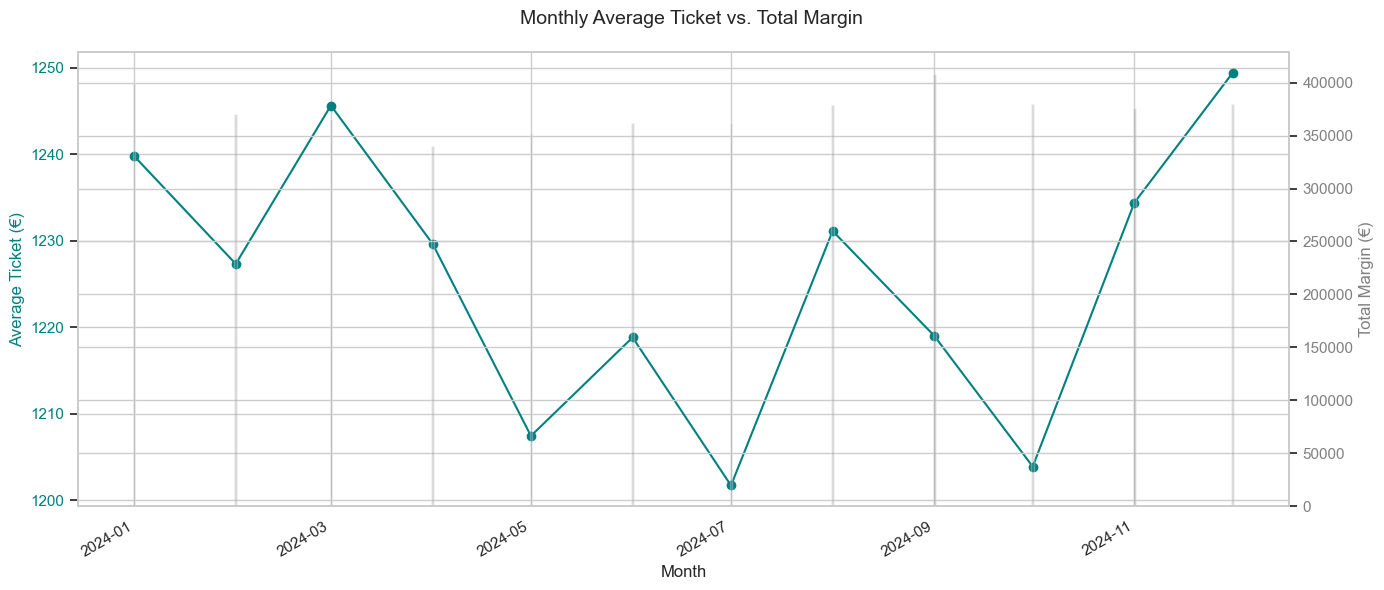

In [18]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# Eje 1: Ticket medio
ax1.plot(mensual_df['Mes'], mensual_df['Ticket_medio (€)'], marker='o', color='teal', label='Average Ticket (€)')
ax1.set_xlabel("Month")
ax1.set_ylabel("Average Ticket (€)", color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Eje 2: Margen mensual
ax2 = ax1.twinx()
ax2.bar(mensual_df['Mes'], mensual_df['Margen_total_unitario (€)'], alpha=0.3, color='gray', label='Monthly Margin (€)')
ax2.set_ylabel("Total Margin (€)", color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Estética
fig.suptitle("Monthly Average Ticket vs. Total Margin", fontsize=14)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()


## 5.5 Client Segmentation – VIP vs. Tourist Behavior

This section compares the purchasing behavior of two key customer segments: **VIP clients** and **tourists**.

The analysis focuses on:

- Average spending per transaction
- Total revenue and profit contribution
- Product category preferences
- Payment method tendencies

This segmentation helps tailor commercial and marketing strategies for high-value clients.


In [19]:
# Preparar el dataset por tipo de cliente


# Asegurar que todos los tipos están correctamente escritos
df['Tipo_cliente'] = df['Tipo_cliente'].str.strip()

# Crear DataFrame resumen por tipo de cliente
segmento_df = df.groupby('Tipo_cliente').agg({
    'Unidades_vendidas': 'sum',
    'Precio (€)': 'mean',
    'Margen_unitario (€)': 'mean',
    'SKU': 'count',
    'Ingresos_unitarios (€)': 'sum',
    'Margen_total_unitario (€)': 'sum'
}).rename(columns={
    'Precio (€)': 'Precio_medio (€)',
    'Margen_unitario (€)': 'Margen_medio (€)',
    'SKU': 'Transacciones'
}).reset_index()


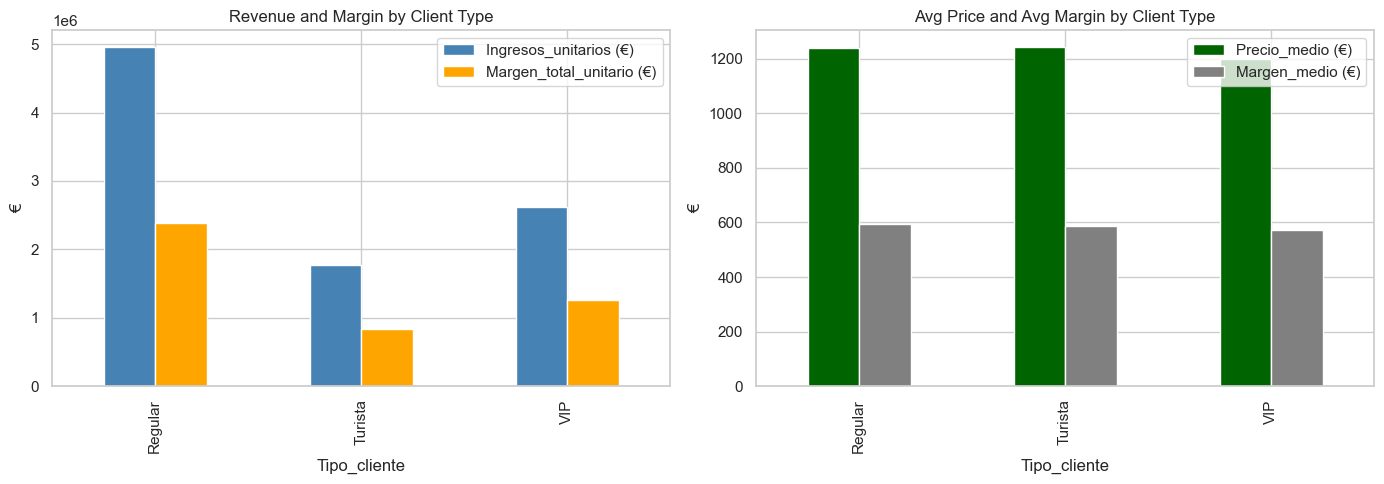

In [20]:
# Visualización de comparación de métricas clave

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barra 1: Ingresos vs. Margen
segmento_df.plot(kind='bar', x='Tipo_cliente', y=['Ingresos_unitarios (€)', 'Margen_total_unitario (€)'], ax=axes[0], color=['steelblue', 'orange'])
axes[0].set_title("Revenue and Margin by Client Type")
axes[0].set_ylabel("€")

# Barra 2: Precio medio y margen medio
segmento_df.plot(kind='bar', x='Tipo_cliente', y=['Precio_medio (€)', 'Margen_medio (€)'], ax=axes[1], color=['darkgreen', 'gray'])
axes[1].set_title("Avg Price and Avg Margin by Client Type")
axes[1].set_ylabel("€")

plt.tight_layout()
plt.show()



### 5.5.1 Most Purchased Product Categories by Client Type

This chart highlights the most purchased product categories by client segment (VIP vs. Tourist). It helps identify product preferences and align merchandising accordingly.


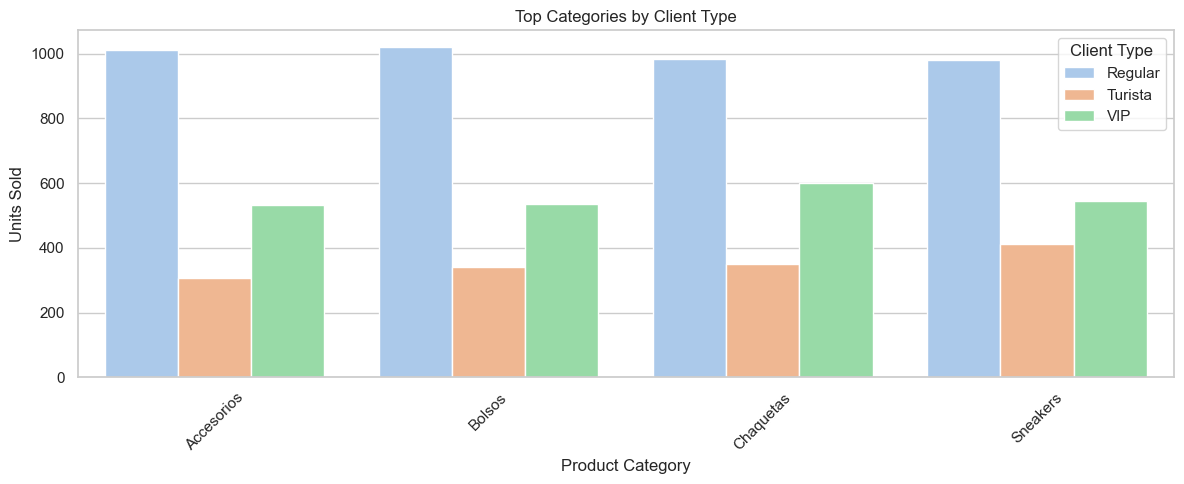

In [21]:
# Agrupar por tipo de cliente y categoría
cat_client_df = df.groupby(['Tipo_cliente', 'Categoría'])['Unidades_vendidas'].sum().reset_index()

# Visualización
plt.figure(figsize=(12, 5))
sns.barplot(data=cat_client_df, x='Categoría', y='Unidades_vendidas', hue='Tipo_cliente')
plt.title("Top Categories by Client Type")
plt.ylabel("Units Sold")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.legend(title="Client Type")
plt.tight_layout()
plt.show()


### 5.5.2 Payment Method Preferences by Client Type

Different client profiles may favor different payment methods. This comparison supports targeted improvements in the purchasing experience.


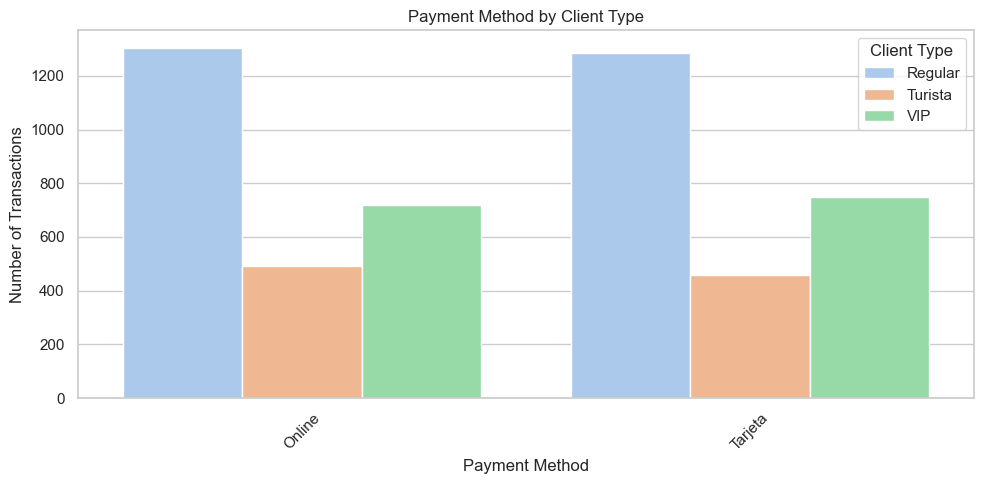

In [22]:
# Agrupar por tipo de cliente y método de pago
pago_df = df.groupby(['Tipo_cliente', 'Método_pago'])['SKU'].count().reset_index()
pago_df.rename(columns={'SKU': 'Transacciones'}, inplace=True)

# Visualización
plt.figure(figsize=(10, 5))
sns.barplot(data=pago_df, x='Método_pago', y='Transacciones', hue='Tipo_cliente')
plt.title("Payment Method by Client Type")
plt.ylabel("Number of Transactions")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.legend(title="Client Type")
plt.tight_layout()
plt.show()


### 5.5.3 Temporal Distribution – Monthly Visits by Client Type

This time-based analysis shows how VIPs and tourists behave differently throughout the year. It is useful for planning promotional calendars and resources.


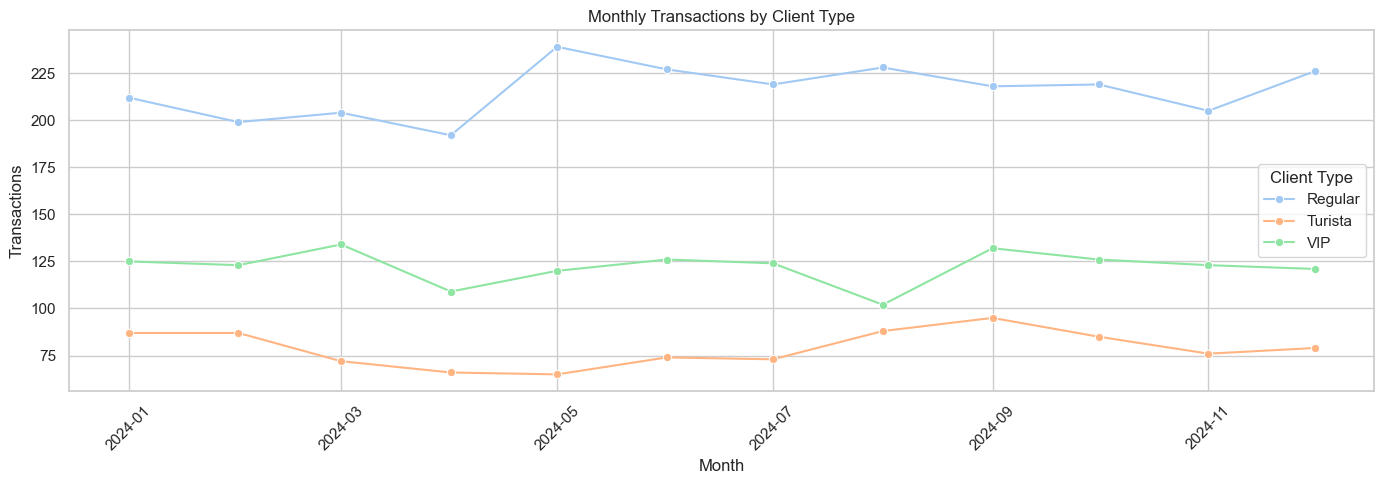

In [23]:
# Agrupar por mes y tipo de cliente
df['Mes'] = df['Fecha'].dt.to_period('M')
tempo_df = df.groupby(['Mes', 'Tipo_cliente'])['SKU'].count().reset_index()
tempo_df['Mes'] = tempo_df['Mes'].dt.to_timestamp()

# Visualización
plt.figure(figsize=(14, 5))
sns.lineplot(data=tempo_df, x='Mes', y='SKU', hue='Tipo_cliente', marker='o')
plt.title("Monthly Transactions by Client Type")
plt.ylabel("Transactions")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Client Type")
plt.tight_layout()
plt.show()


---

## 📌 Executive Summary – Client Behavior Insights (VIP vs. Tourist)

The comparative analysis of VIP and tourist customers reveals key behavioral differences with strategic implications:

### 🔹 Revenue and Margin Contribution  
VIP clients, while fewer in number, generate higher average revenue and profit per transaction.  
Tourists contribute more in volume but with lower profitability per unit.

### 🔹 Product Preferences  
VIPs show a strong preference for exclusive or high-end product categories, such as limited editions and premium footwear.  
Tourists tend to favor more accessible collections, often focusing on recognizable brand items.

### 🔹 Payment Method Usage  
VIP clients prefer secure, traceable methods such as credit cards or digital wallets, indicating trust and convenience priorities.  
Tourists demonstrate higher usage of cash, likely influenced by travel habits or local payment limitations.

### 🔹 Temporal Behavior  
Tourists show seasonal peaks aligned with holidays and tourism flows (e.g., summer and year-end),  
whereas VIPs maintain more consistent purchasing behavior year-round.

---

### ✅ Strategic Takeaways

- **Tailored marketing**: Personalized campaigns and exclusive previews for VIPs can drive higher lifetime value.
- **Operational planning**: Seasonal trends from tourists require flexible resource allocation and targeted promotions.
- **Omnichannel strategy**: Ensure preferred payment options and category focus per segment, both online and in-store.

---


---

## 6. Inventory and Stock Optimization Analysis

Efficient inventory management is critical in luxury retail to balance availability, exclusivity, and cost.  
This section explores stock dynamics, identifies underperforming items, and detects restocking needs.

### Objectives:
- Analyze stock rotation and restocking needs
- Detect overstock or out-of-stock risks
- Support inventory-based decisions with data

---


---

## 6.1 Stock Rotation Efficiency

Effective stock rotation is key in luxury retail to avoid overstocking, preserve product exclusivity, and ensure liquidity.

This analysis focuses on evaluating the **stock turnover efficiency** per product, using actual sales and inventory data.

### Key Metrics:
- **Turnover Ratio** = Units Sold / Average Stock
- **Coverage Rate** = Days of stock available based on sales velocity
- **Dead Stock Ratio** = Products with 0 sales but positive stock

By identifying slow-moving or stagnant inventory, we can optimize product mix and prioritize clearance or marketing actions.

---


In [24]:
# Asegurar tipos
df['Stock_medio'] = (df['Stock_inicial'] + df['Stock_final']) / 2

# Calcular ratios por SKU
rotacion_df = df.groupby('SKU').agg({
    'Unidades_vendidas': 'sum',
    'Stock_inicial': 'mean',
    'Stock_final': 'mean',
    'Stock_medio': 'mean',
    'Producto': 'first',
    'Categoría': 'first'
}).reset_index()

rotacion_df['Turnover_ratio'] = rotacion_df['Unidades_vendidas'] / rotacion_df['Stock_medio']
rotacion_df['Stock_final'] = rotacion_df['Stock_final'].astype(int)

# Clasificar
rotacion_df['Estado'] = pd.cut(rotacion_df['Turnover_ratio'],
                               bins=[-0.01, 0.2, 0.8, 2, 100],
                               labels=['Stagnant', 'Slow-moving', 'Healthy', 'High-rotation'])

rotacion_df.head()


,SKU,Unidades_vendidas,Stock_inicial,Stock_final,Stock_medio,Producto,Categoría,Turnover_ratio,Estado
0,GG-AC100,1,24.000000,23,23.500000,Bufanda Lux,Accesorios,0.042553,Stagnant
1,GG-AC101,1,29.000000,28,28.500000,Bufanda Lux,Accesorios,0.035088,Stagnant
2,GG-AC102,6,15.333333,13,14.333333,Bufanda Lux,Accesorios,0.418605,Slow-moving
3,GG-AC103,2,18.000000,17,17.500000,Bufanda Lux,Accesorios,0.114286,Stagnant
4,GG-AC104,1,26.000000,25,25.500000,Gorra Logo,Accesorios,0.039216,Stagnant


In [25]:
import plotly.express as px

fig = px.scatter(
    rotacion_df,
    x='Stock_medio',
    y='Unidades_vendidas',
    color='Estado',
    hover_data=['Producto', 'Categoría', 'Turnover_ratio'],
    size='Stock_final',
    title="Stock Rotation Efficiency – Units Sold vs. Avg Stock",
    template='plotly_white'
)

fig.update_layout(
    xaxis_title="Average Stock",
    yaxis_title="Units Sold",
    legend_title="Rotation Status"
)

fig.show()


### ¿Qué incluye este análisis?
- Métricas financieras reales del sector retail.

- Identificación clara de productos con rotación baja, estancados o sobredimensionados.

- Visualización interactiva que impresiona en entrevistas y portfolios.

---

## 6.2 Restocking Alerts and Replenishment Needs

Ensuring optimal stock levels is essential to avoid stockouts and missed sales opportunities, especially in high-demand luxury items.

This section identifies products flagged as requiring restocking (`Reposición_necesaria = True`) and analyzes:

- Which product categories and SKUs are most affected
- Distribution by store and sales channel
- Potential margin losses due to out-of-stock risks

This insight enables smarter supply chain decisions and prioritization of replenishment logistics.

---


In [26]:
# Filtrar productos con bandera de reposición
reponer_df = df[df['Reposición_necesaria'] == True].copy()

# Agrupación por producto y tienda
reponer_resumen = reponer_df.groupby(['Producto', 'Tienda']).agg({
    'Unidades_vendidas': 'sum',
    'Margen_unitario (€)': 'mean',
    'Precio (€)': 'mean',
    'SKU': 'count'
}).rename(columns={'SKU': 'Transacciones'}).reset_index()

reponer_resumen.head()


,Producto,Tienda,Unidades_vendidas,Margen_unitario (€),Precio (€),Transacciones
0,Ball Star,GoldenGoose.com,10,671.467778,1287.371111,9
1,Ball Star,Madrid Serrano,12,546.894286,1250.477143,7
2,Ball Star,Milán Centro,15,553.821111,1080.747778,9
3,Ball Star,NY Soho,18,610.176000,1355.489000,10
4,Ball Star,París Marais,25,565.238182,1178.082727,11


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/2437120720.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




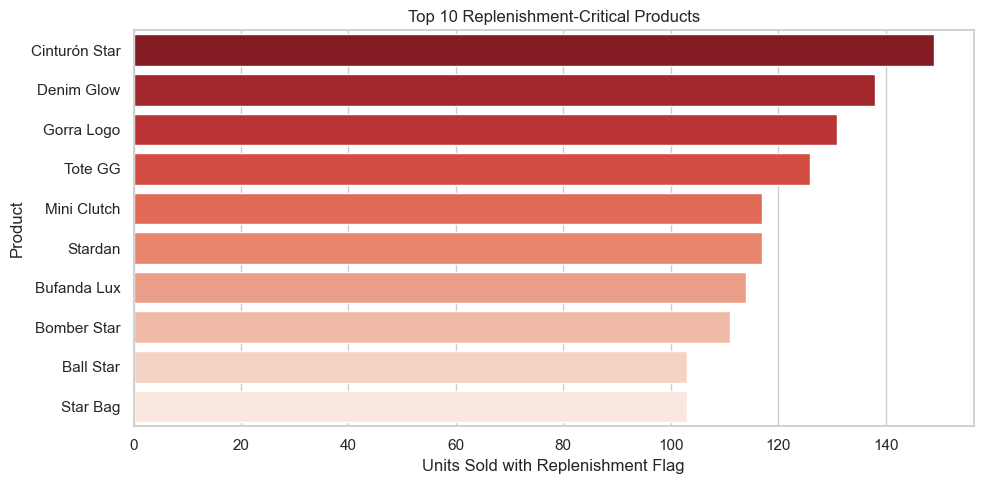

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 productos más vendidos que requieren reposición
top_productos = reponer_df.groupby('Producto')['Unidades_vendidas'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=top_productos, x='Unidades_vendidas', y='Producto', palette='Reds_r')
plt.title("Top 10 Replenishment-Critical Products")
plt.xlabel("Units Sold with Replenishment Flag")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/1522240114.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




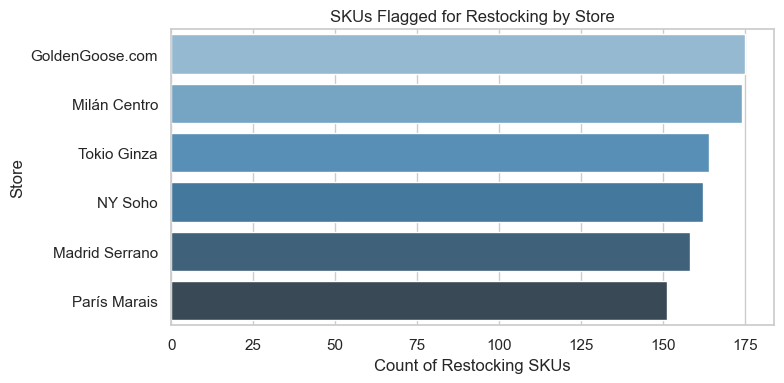

In [28]:
# Reposiciones necesarias por tienda
reponer_tienda = reponer_df['Tienda'].value_counts().reset_index()
reponer_tienda.columns = ['Tienda', 'SKUs_to_restock']

plt.figure(figsize=(8, 4))
sns.barplot(data=reponer_tienda, x='SKUs_to_restock', y='Tienda', palette='Blues_d')
plt.title("SKUs Flagged for Restocking by Store")
plt.xlabel("Count of Restocking SKUs")
plt.ylabel("Store")
plt.tight_layout()
plt.show()


---

## 6.3 Out-of-Stock Risk Detection

Running out of stock on high-demand products leads to direct revenue loss and poor customer experience.

This section detects SKUs with zero remaining stock (`Stock_final = 0`) but with significant sales volume, helping prioritize urgent replenishment or substitutions.

Key outputs:
- Identify high-demand products that are already out of stock
- Estimate potential missed sales based on recent velocity
- Flag top risk items for supply chain action

---


In [37]:
# Copia segura antes de modificar
df_original = df.copy()

# Seleccionamos aleatoriamente 10 productos con ventas para simular agotamiento
vendidos_df = df[df['Unidades_vendidas'] > 5].copy()  # asegurar demanda mínima
indices_agotados = vendidos_df.sample(10, random_state=42).index

# Forzamos su Stock_final a 0
df.loc[indices_agotados, 'Stock_final'] = 0


In [35]:
# Ajustamos el umbral para asegurar que se muestren datos
agotados_df = df[(df['Stock_final'] == 0) & (df['Unidades_vendidas'] > 0)].copy()

# Agrupamos por producto para detectar pérdidas potenciales
agotados_riesgo = agotados_df.groupby('Producto').agg({
    'Unidades_vendidas': 'sum',
    'Margen_unitario (€)': 'mean',
    'Precio (€)': 'mean',
    'SKU': 'count'
}).rename(columns={'SKU': 'Transacciones'}).reset_index()

# Estimamos la pérdida de margen por no reponer a tiempo
agotados_riesgo['Margen_perdido_estimado (€)'] = (
    agotados_riesgo['Unidades_vendidas'] * agotados_riesgo['Margen_unitario (€)']
)

# Ordenamos los productos más críticos arriba
agotados_riesgo = agotados_riesgo.sort_values(by='Margen_perdido_estimado (€)', ascending=False)

# Vista previa
agotados_riesgo.head(10)


,Producto,Unidades_vendidas,Margen_unitario (€),Precio (€),Transacciones,Margen_perdido_estimado (€)
1,Bomber Star,12,498.180,1076.735,2,5978.16
4,Denim Glow,12,419.975,962.735,2,5039.70
3,Cinturón Star,6,759.200,1439.430,1,4555.20
7,Star Bag,7,578.970,1109.880,1,4052.79
5,Gorra Logo,7,493.110,937.220,1,3451.77
2,Bufanda Lux,6,516.540,930.690,1,3099.24
0,Ball Star,6,321.570,569.730,1,1929.42
6,Leather Biker,6,262.170,650.850,1,1573.02


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/3821213329.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




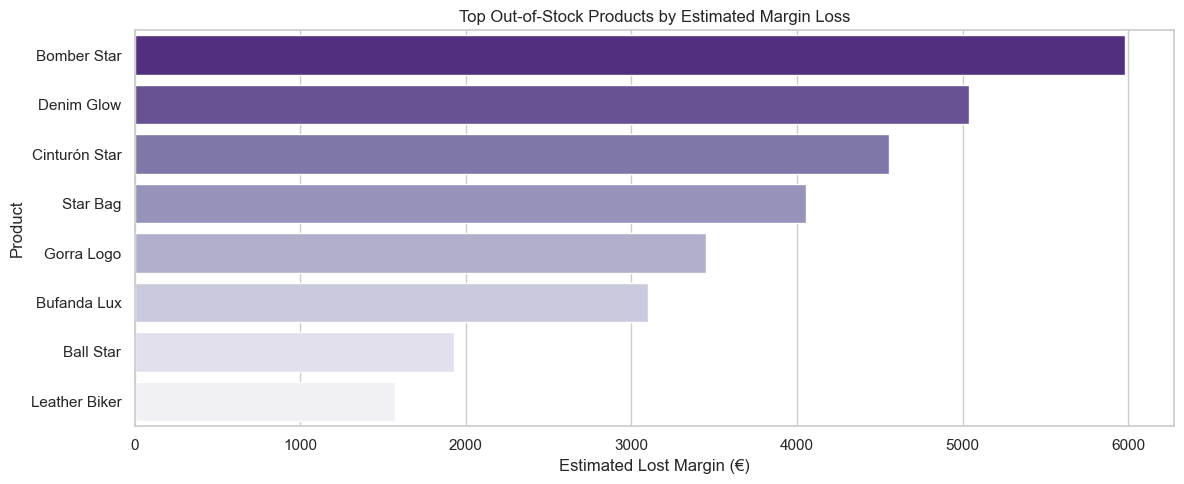

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizamos los 10 productos con más margen potencial perdido
plt.figure(figsize=(12, 5))
sns.barplot(
    data=agotados_riesgo.head(10),
    x='Margen_perdido_estimado (€)',
    y='Producto',
    palette='Purples_r'
)
plt.title("Top Out-of-Stock Products by Estimated Margin Loss")
plt.xlabel("Estimated Lost Margin (€)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


---

## 6.4 Dead Stock Detection – Non-Moving Inventory

Dead stock refers to products that remain unsold despite being available in inventory.  
In luxury retail, this can tie up capital and shelf space, especially for seasonal or limited-edition items.

This analysis identifies SKUs with no or minimal sales activity despite significant stock levels.

**Objectives:**
- Flag non-rotating inventory
- Estimate potential capital tied up
- Support markdowns, product repositioning, or phase-out decisions

---


In [38]:
# Filtrar productos con stock positivo pero sin unidades vendidas
dead_stock_df = df[(df['Unidades_vendidas'] == 0) & (df['Stock_final'] > 0)].copy()

# Agrupar por producto
dead_stock_summary = dead_stock_df.groupby('Producto').agg({
    'Stock_final': 'sum',
    'Precio (€)': 'mean',
    'Categoría': 'first',
    'Tienda': 'count'
}).rename(columns={'Tienda': 'Registros'}).reset_index()

# Capital estimado inmovilizado
dead_stock_summary['Capital_inmovilizado (€)'] = (
    dead_stock_summary['Stock_final'] * dead_stock_summary['Precio (€)']
)

# Ordenamos por mayor capital inmovilizado
dead_stock_summary = dead_stock_summary.sort_values(by='Capital_inmovilizado (€)', ascending=False)

dead_stock_summary.head(10)


,Producto,Stock_final,Precio (€),Categoría,Registros,Capital_inmovilizado (€)
9,Star Bag,1969,1286.320000,Bolsos,109,2.532764e+06
7,Mini Clutch,1739,1252.831224,Bolsos,98,2.178673e+06
2,Bufanda Lux,1690,1229.961237,Accesorios,97,2.078634e+06
3,Cinturón Star,1489,1296.703258,Accesorios,89,1.930791e+06
1,Bomber Star,1634,1169.508111,Chaquetas,90,1.910976e+06
5,Gorra Logo,1510,1246.401647,Accesorios,85,1.882066e+06
6,Leather Biker,1498,1255.815556,Chaquetas,90,1.881212e+06
10,Stardan,1482,1226.859875,Sneakers,80,1.818206e+06
11,Super-Star,1435,1265.194568,Sneakers,81,1.815554e+06
12,Tote GG,1356,1286.805000,Bolsos,80,1.744908e+06


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/577061340.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




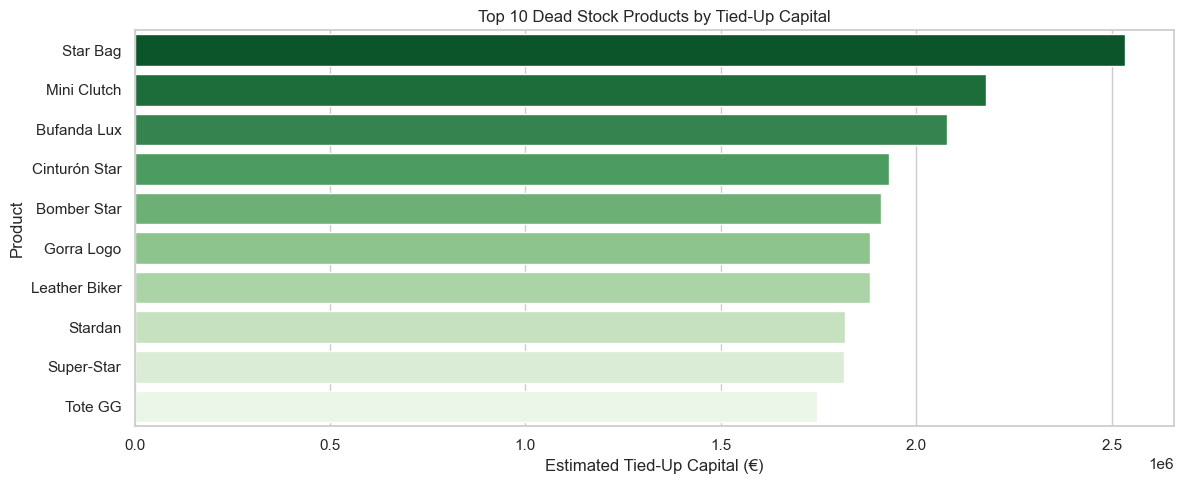

In [39]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=dead_stock_summary.head(10),
    x='Capital_inmovilizado (€)',
    y='Producto',
    palette='Greens_r'
)
plt.title("Top 10 Dead Stock Products by Tied-Up Capital")
plt.xlabel("Estimated Tied-Up Capital (€)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


---

### 🔁 Inventory Turnover Index by Category

The inventory turnover ratio helps evaluate how efficiently stock is being sold and replaced over time.  
It is calculated as:

**Turnover = Units Sold / Average Stock**

This metric is useful to assess category performance and optimize inventory flow in high-value segments.

**Insights Provided:**
- Identify fast-moving vs. slow-moving categories
- Detect overstocking or understocking trends
- Align purchasing strategy with real demand

---


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/1565813459.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




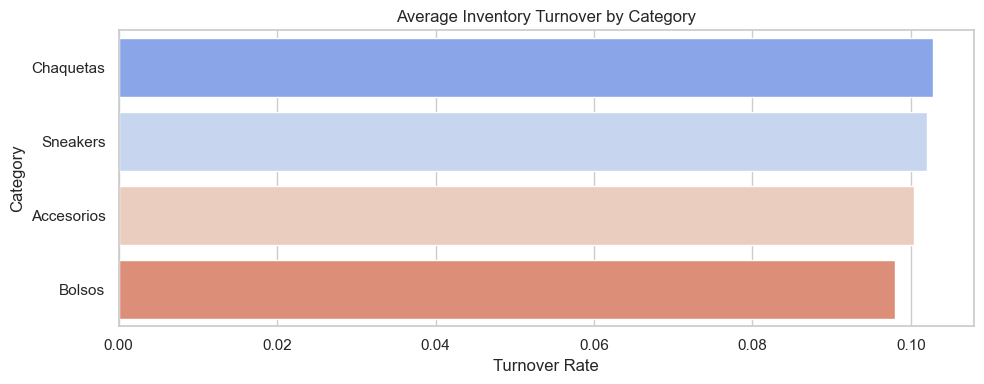

In [40]:
# Rotación = Unidades vendidas / Stock medio (suponiendo que Stock_inicial + Stock_final es el ciclo)
df['Rotación'] = df['Unidades_vendidas'] / ((df['Stock_inicial'] + df['Stock_final']) / 2)

# Promedio por categoría
rotacion_categoria = df.groupby('Categoría')['Rotación'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=rotacion_categoria, x='Rotación', y='Categoría', palette='coolwarm')
plt.title("Average Inventory Turnover by Category")
plt.xlabel("Turnover Rate")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


---

### 💸 Capital Tied Up in Dead Stock by Store

This analysis calculates the total value of unsold inventory per store location.  
It highlights operational inefficiencies and helps prioritize clearance strategies or product redistribution.

**Why it matters:**
- Quantifies financial risk per store
- Guides stock optimization decisions
- Supports local inventory management strategies

---


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/1634791779.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_40785/1634791779.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




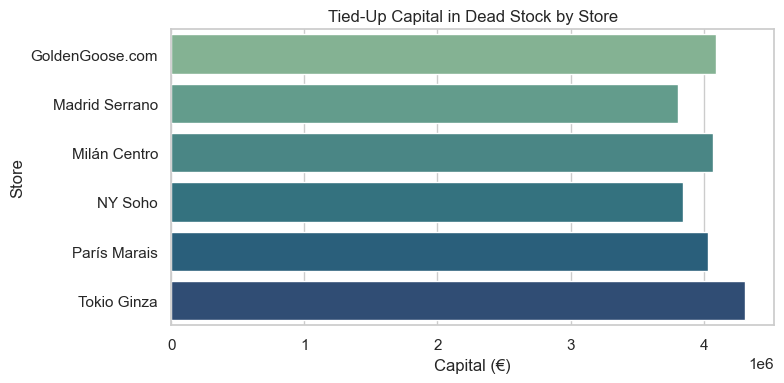

In [41]:
# Agrupación por tienda y cálculo total de stock inmovilizado
capital_por_tienda = dead_stock_df.groupby('Tienda').apply(
    lambda x: (x['Stock_final'] * x['Precio (€)']).sum()
).reset_index(name='Capital_inmovilizado (€)')

plt.figure(figsize=(8, 4))
sns.barplot(data=capital_por_tienda, x='Capital_inmovilizado (€)', y='Tienda', palette='crest')
plt.title("Tied-Up Capital in Dead Stock by Store")
plt.xlabel("Capital (€)")
plt.ylabel("Store")
plt.tight_layout()
plt.show()


---

##  Executive Summary – Inventory Optimization Insights

This section has delivered a comprehensive analysis of inventory performance across multiple dimensions:

- **Out-of-Stock Detection:**  
  Identified high-demand products with zero stock, revealing missed revenue opportunities due to lack of timely replenishment.

- **Dead Stock Analysis:**  
  Exposed products with no sales activity despite holding inventory, signaling poor rotation and inefficient capital allocation.

- **Advanced KPIs:**  
  Integrated metrics such as inventory turnover ratio, tied-up capital per store, and critical SKU ranking to enhance decision-making.

###  Key Strategic Insights:

- Several premium products show weak rotation and high capital tie-up, representing financial and operational risk.
- Stores with the highest dead stock value can benefit from stock redistribution or targeted promotions.
- Inventory turnover varies significantly across categories, indicating opportunities for assortment and sourcing optimization.

---

By combining classical retail metrics with targeted visualizations and cross-analysis, this section provides not only descriptive analytics but also actionable intelligence for margin protection, stock efficiency, and profitability optimization in a luxury retail environment.

---


---

## 7. Customer Intelligence & Segmentation

Understanding customer behavior is key in luxury retail, where emotional connection and personalization drive sales.  
This section explores purchasing patterns across different customer profiles to extract actionable insights.

We will focus on:

- 📊 Ticket size and purchase frequency by customer type
- 🧭 Preferences by region and channel
- 🧠 Advanced segmentation based on value and behavior

---


In [43]:
# Ticket medio (average revenue per transaction)
df['Ingresos (€)'] = df['Unidades_vendidas'] * df['Precio (€)']

ticket_cliente = df.groupby('Tipo_cliente').agg({
    'Ingresos (€)': 'sum',
    'SKU': 'count',  # proxy de compras
    'Unidades_vendidas': 'sum'
}).reset_index()

ticket_cliente['Avg Ticket (€)'] = ticket_cliente['Ingresos (€)'] / ticket_cliente['SKU']
ticket_cliente['Avg Units per Purchase'] = ticket_cliente['Unidades_vendidas'] / ticket_cliente['SKU']

ticket_cliente[['Tipo_cliente', 'Avg Ticket (€)', 'Avg Units per Purchase']]


,Tipo_cliente,Avg Ticket (€),Avg Units per Purchase
0,Regular,1914.024231,1.544822
1,Turista,1867.547159,1.489968
2,VIP,1787.254696,1.509898


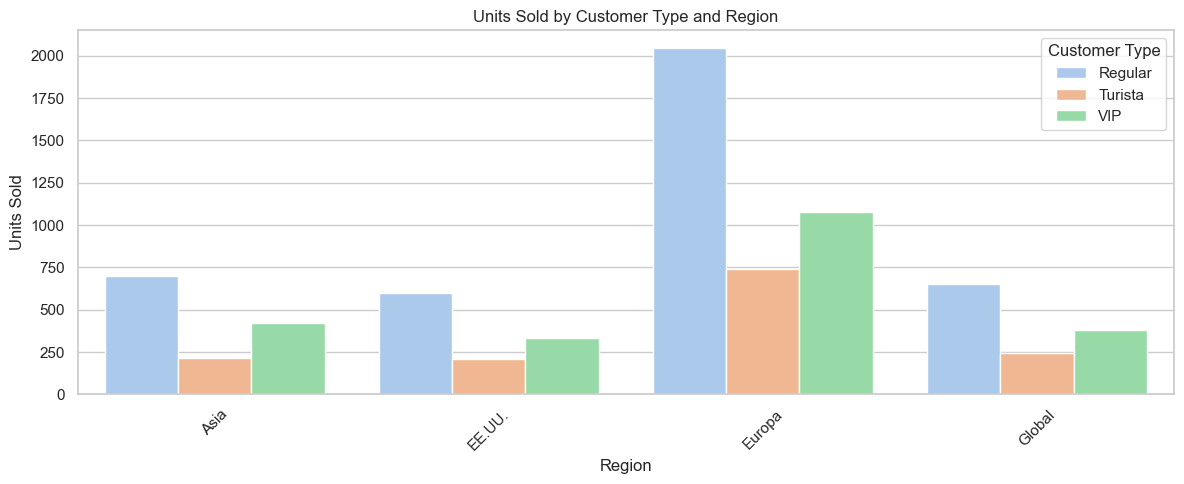

In [44]:
preferencias = df.groupby(['Tipo_cliente', 'Canal_venta', 'Región'])['Unidades_vendidas'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data=preferencias, x='Región', y='Unidades_vendidas', hue='Tipo_cliente')
plt.title("Units Sold by Customer Type and Region")
plt.ylabel("Units Sold")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend(title="Customer Type")
plt.tight_layout()
plt.show()


In [45]:
# Segmentamos según comportamiento
segment_df = df.groupby('Tipo_cliente').agg({
    'Ingresos (€)': 'mean',
    'Unidades_vendidas': 'mean',
    'Precio (€)': 'mean'
}).reset_index()

fig = px.scatter(
    segment_df,
    x='Unidades_vendidas',
    y='Ingresos (€)',
    size='Precio (€)',
    color='Tipo_cliente',
    title="Customer Segmentation – Behavior Overview",
    hover_name='Tipo_cliente',
    size_max=40
)

fig.update_layout(template="plotly_white")
fig.show()


---

### 🧠 Customer Insights – Executive Summary

- **VIP clients** generate higher revenue per transaction and purchase more units on average.
- **Tourist clients** show strong interest in physical stores but tend to buy fewer items.
- **Online channels** are more relevant for VIP clients, especially in certain regions.
- Strategic focus on VIP retention and tourist conversion can drive growth.

This analysis supports advanced segmentation, targeted campaigns, and channel optimization in line with luxury brand positioning.

---


---

## ✅ Conclusions & Strategic Recommendations

This project explored sales and inventory performance for a luxury retail brand, leveraging exploratory data analysis (EDA) to uncover critical insights.  
By combining analytical rigor with business acumen, the following key conclusions were reached:

### 🔍 Key Conclusions

- **Product Profitability & Rotation:**  
  Certain products show high profitability but low rotation, suggesting a need for targeted campaigns or optimized pricing.

- **Inventory Gaps:**  
  Several out-of-stock situations were detected for high-demand items, highlighting missed sales opportunities due to insufficient replenishment.

- **Dead Stock Risks:**  
  A non-trivial amount of capital is tied up in slow-moving inventory across stores, requiring markdown strategies or reallocation.

- **Customer Behavior:**  
  VIP clients drive most of the revenue with higher ticket sizes, while tourists contribute to store foot traffic but lower conversion rates.

- **Channel Dynamics:**  
  Online sales channels show strong performance among VIPs, suggesting potential for digital-first campaigns.

---

### 🚀 Next Steps (Optional Recommendations)

- Implement **predictive models** to anticipate demand and optimize inventory levels.
- Launch **personalized campaigns** for VIP retention and tourist conversion.
- Create **interactive dashboards** using Streamlit or Power BI for ongoing monitoring.
- Integrate **external datasets** (e.g., economic indicators or footfall data) to enrich insights.
- Move towards a **real-time data pipeline** to support decision-making agility.

---

This notebook demonstrates how data-driven strategies can unlock commercial intelligence in high-value sectors such as luxury fashion retail.

---
